# Setup

In [1]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
np.random.seed(123)
rnd.seed(123)

# Recursion: Theory
- Divide and Conquer
- Mathematical Induction
- Recursive Algorithm structure
    - Base case
    - Recursive case
- Combinatorial Objects
    - Permutations
    - Arrengements
    - Combinations

In [2]:
# TODO

# Sample Problems and Solutions

## Pow(x,n)
### Problem Description
Implement pow(x, n), that calculates x raised to the power n (i.e., x^n)

Since the value can be quite large, return value % 1000000007

#### Constraints:

    -100.0 < x < 100.0
    -2^31 <= n <= 2^31-1


#### Example 1:
```
Input: x = 2.00000, n = 10
Output: 1024.00000
```
#### Example 2:
```
Input: x = 2.10000, n = 3
Output: 9.26100
```

#### Example 3:
```
Input: x = 2.00000, n = -2
Output: 0.25000
Explanation: 2^-2 = 1/2^2 = 1/4 = 0.25
```

### Solution 1: Bruteforce
#### Description
In the naive implementation one can multiply x by x n time in a cycle

#### Complexity Analysis
- TC O(n)
- SC O(c)

#### Code

In [9]:
def pow_bf(x, n):
    if n == 0:
        return 1
    result = x
    for idx in range(abs(n)-1):
        result = (result * x) % 1000000123
    return result if n > 0 else 1.0/result

In [10]:
assert pow_bf(2,10) == 1024
assert pow_bf(2,-10) == 1/1024

### Solution 2: Recursive
#### Description
Optimized recursive implementation that splits N by 2 for each recursive call

#### Complexity Analysis
- TC O(logn)
- SC O(logn) 
#### Code

In [11]:
def pow_rec(x, n):
    def helper(x, an):
        # base cases
        if an == 0:
            return 1
        if an == 1:
            return x
        # recursive cases
        p = helper(x, an//2)
        result = (p*p if an % 2 == 0 else p*p*x) % 1000000123
        return result
            
    an = abs(n)
    result = helper(x, an)
    return result if n >= 0 else 1.0/result

In [12]:
assert pow_rec(2,10) == 1024
assert pow_rec(2,-10) == 1/1024

In [26]:
for name, f in [('Bruteforce', pow_bf), ('Recursive - LogN', pow_rec)]:
    for x, n in [(2, 10), (2, -10), (10,1000), (10,-1000)]:
        tik = time.time()
        C = 10000
        for idx in range(C):
            f(x, n)
        tak = time.time()
        print(f'{name}: execution time to calculate {C} times pow ({x},{n}) took {tak-tik:3.2f}sec')


Bruteforce: execution time to calculate 10000 times pow (2,10) took 0.01sec
Bruteforce: execution time to calculate 10000 times pow (2,-10) took 0.01sec
Bruteforce: execution time to calculate 10000 times pow (10,1000) took 0.82sec
Bruteforce: execution time to calculate 10000 times pow (10,-1000) took 0.83sec
Recursive - LogN: execution time to calculate 10000 times pow (2,10) took 0.01sec
Recursive - LogN: execution time to calculate 10000 times pow (2,-10) took 0.01sec
Recursive - LogN: execution time to calculate 10000 times pow (10,1000) took 0.02sec
Recursive - LogN: execution time to calculate 10000 times pow (10,-1000) took 0.02sec


### Summary
Recursive Log N implementation is 40+ times faster for calculate 10 to 1000th power, which is expected

## N-Queen Problem

### Problem Description
Given an integer n, find all the possible ways to position n queens on an n×n chessboard so that no two queens attack each other.
A queen in chess can move horizontally, vertically, or diagonally.

#### Example 1
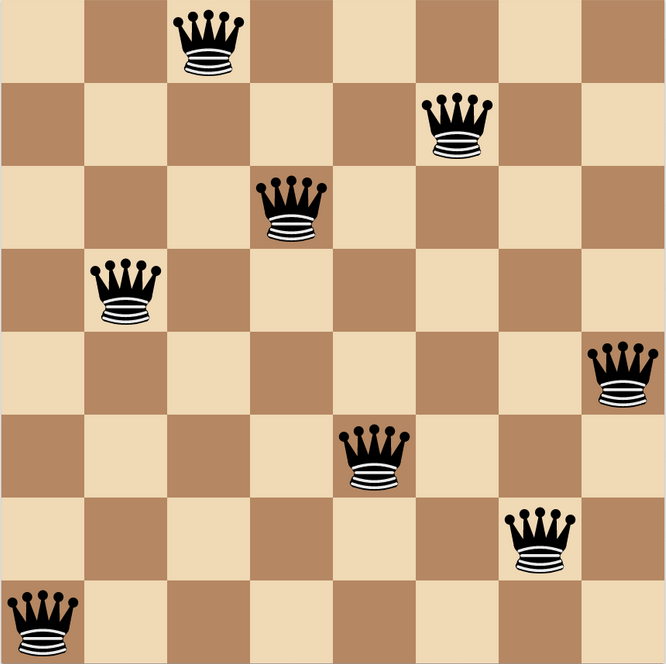

### Solution 1
- TC - exponential 
- SC - O(n^2)

In [1]:
def find_n_queen_positions(n):
    slate = [[-1]*n for _ in range(n)]
    qslate = [[-1]*n for _ in range(n)]
    results = []
    def helper(n, slate, row):
        # base
        if row == n:
            result = []
            for r in qslate:
                result.append(''.join([('-' if v == -1 else 'q') for v in r]))
            results.append(result)
            return
        
        # recursive
        for c in range(n): # O(n)
            # if slate position is possible
            if slate[row][c] == -1:
                qslate[row][c] = row
                # mark all states covered by that queen - O(n)
                for idx in range(row, n):
                    diagonal_shift = (idx-row)
                    if c+diagonal_shift < n and slate[idx][c+diagonal_shift] == -1:
                        slate[idx][c+diagonal_shift] = row
                    if slate[idx][c] == -1:
                        slate[idx][c] = row
                    if c-diagonal_shift >= 0 and slate[idx][c-diagonal_shift] == -1:
                        slate[idx][c-diagonal_shift] = row
                # recursivelly call next row
                helper(n, slate, row+1)
                qslate[row][c] = -1
                # unmark all states O(n)
                for idx in range(row, n):
                    diagonal_shift = (idx-row)
                    if c+(idx-row) < n and slate[idx][c+diagonal_shift] == row:
                        slate[idx][c+diagonal_shift] = -1
                    if slate[idx][c] == row:
                        slate[idx][c] = -1
                    if c-diagonal_shift >= 0 and slate[idx][c-diagonal_shift] == row:
                        slate[idx][c-diagonal_shift] = -1
                
    helper(n, slate, 0)
    return results

# References (TODO)
- 